In [1]:
# cSpell: ignore sklearnex joblib
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from datetime import datetime
import joblib

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
data=np.load('mnist_train_data.npy')
labels=np.load('mnist_train_labels.npy')

In [3]:
data.shape

(60000, 28, 28)

In [4]:
labels.shape

(60000,)

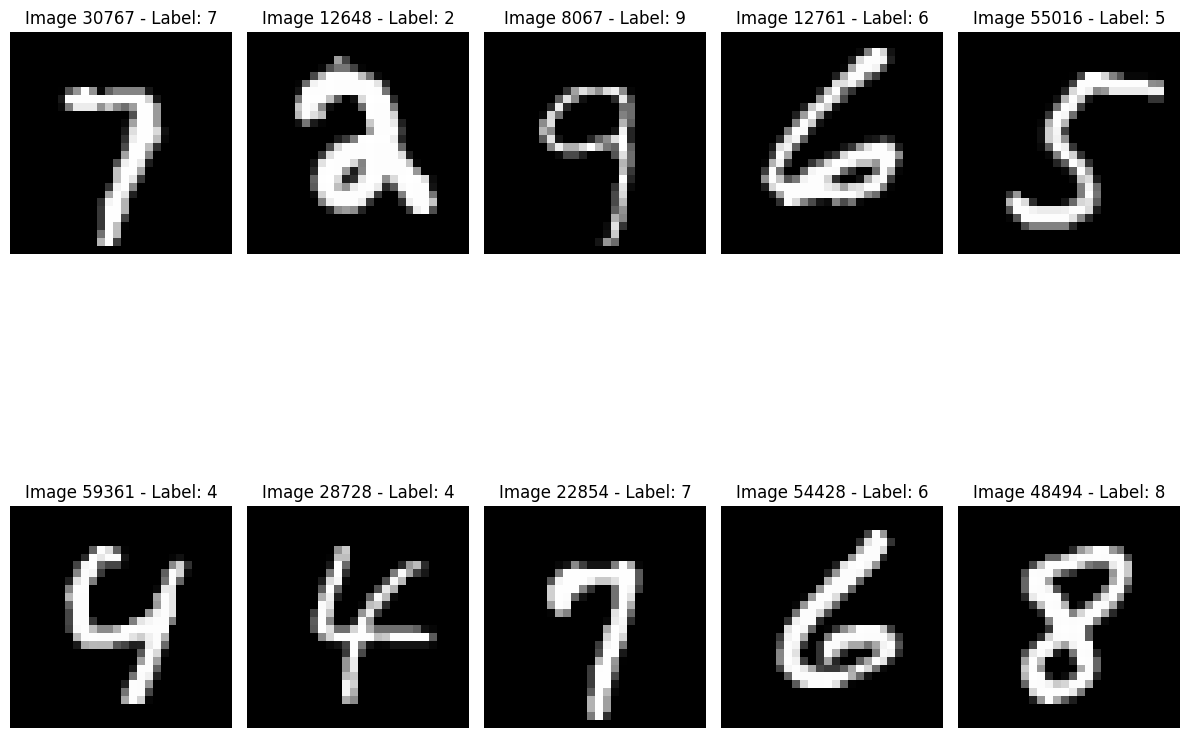

In [5]:
#cSpell: ignore figsize imshow cmap

# Create the figure and subplots
fig, axes = plt.subplots(2, 5, figsize=(12, 12))
random_range = random.sample(range(len(data)), 10) 
# Iterate through random indices and display images
for counter, random_index in enumerate(random_range, 0):
    ax = axes.flat[counter]  # Access subplot using flattened array
    ax.imshow(data[random_index], cmap='gray')
    ax.set_title(f"Image {random_index + 1} - Label: {labels[random_index]}")
    ax.axis("off")

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
 # Choose a random image


In [7]:
def print_pixelated_image(image:list):

    # Print the image data as a 2D matrix
    for row in image:
        for pixel in row:
            # Format the pixel value for printing
            value_str = f"{pixel:3}"  # Adjust spacing as needed
            print(value_str, end=" ")
        print()
        

# Select a random image index
image_index = np.random.randint(0, 60000) 

# Extract the image data
image = data[image_index]
print(f'Label {labels[image_index]}')
print_pixelated_image(image=image)

Label 1
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 255 163   1   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 207 253 253  97   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 144 253 253 253 145   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 199 253 253 253  30   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  42 232 253 253 196  12   0   0 

In [8]:
# Step 1: Count of each class in the original dataset
class_counts = {label: np.sum(labels == label) for label in range(10)}

# Step 2: Train-Test Split with uniform distribution
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

# Step 3: Count of each class in the train set
train_class_counts = {label: np.sum(y_train == label) for label in range(10)}

# Step 4: Count of each class in the test set
test_class_counts = {label: np.sum(y_test == label) for label in range(10)}

# Displaying the results
print("Original Class Counts:", class_counts)
print("\nTrain Set Class Counts:", train_class_counts)
print("\nTest Set Class Counts:", test_class_counts)


Original Class Counts: {0: 5894, 1: 6764, 2: 5978, 3: 6096, 4: 5858, 5: 5400, 6: 5929, 7: 6302, 8: 5829, 9: 5950}

Train Set Class Counts: {0: 4715, 1: 5411, 2: 4782, 3: 4877, 4: 4687, 5: 4320, 6: 4743, 7: 5042, 8: 4663, 9: 4760}

Test Set Class Counts: {0: 1179, 1: 1353, 2: 1196, 3: 1219, 4: 1171, 5: 1080, 6: 1186, 7: 1260, 8: 1166, 9: 1190}


In [9]:
X_train = np.array([sample.flatten(order='F') for sample in X_train])
X_test=np.array([sample.flatten(order='F') for sample in X_test])

In [10]:
index=23768
print(y_train[index])
print_pixelated_image(X_train[index].reshape(28,28).T)

3
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0 153 255 254 243 155 227 136 136  84  17   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0  44 235 253 253 253 253 253 253 253 253 249  81   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0  23 222 253 253 253 253 253 253 253 253 253 244  60   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0  94 212 253 213 182 182 182 182 247 253 253 176   0   0   0   

In [11]:
# cSpell: ignore arange joblib
# Step 1: Define the kNN model
knn_model = KNeighborsClassifier(metric='euclidean')

# Step 2: Define the parameter grid for cross-validation
param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20

# Step 3: Perform cross-validation grid search
grid_search = GridSearchCV(knn_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Step 4: Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

# Step 5: Train the final kNN model using the best k on the entire training dataset
final_knn_model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
final_knn_model.fit(X_train, y_train)

# Step 6: Save the final model to disk with a unique name
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'knn_model_{best_k}_{timestamp}.joblib'
joblib.dump(final_knn_model, model_filename)
print(f"Final model saved as '{model_filename}'")

# Step 7: Evaluate the final model on the test dataset
y_test_predictions = final_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_predictions)
print("Test Accuracy with k =", best_k, ":", accuracy)

Best k: 1
Final model saved as 'knn_model_1_20240224_220535.joblib'
Test Accuracy with k = 1 : 0.9704166666666667


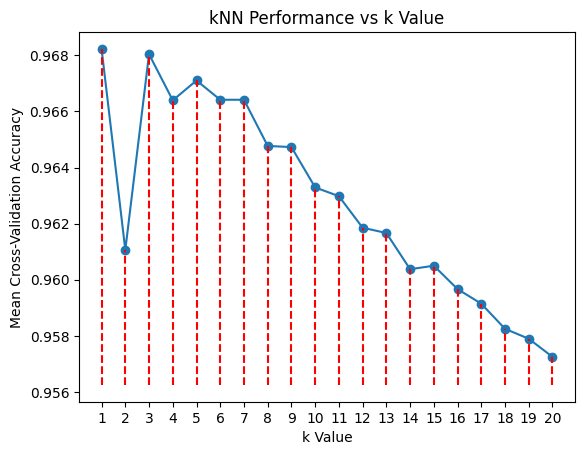

In [12]:
# cSpell: ignore linestyle vlines xlabel ylabel xticks

# Your existing code
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid.get('n_neighbors', 'Not found')
plt.plot(k_values, mean_scores, marker='o')

# Calculate ymin as a bit below the minimum of mean_scores
ymin = min(mean_scores) - 0.001  # Adjust this value as needed

# Add vertical lines
for k, score in zip(k_values, mean_scores):
    plt.vlines(x=k, ymin=ymin, ymax=score, color='red', linestyle='--')
plt.title('kNN Performance vs k Value')
plt.xlabel('k Value')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values)  # Set custom x-axis ticks
plt.grid(False)  # Set to False to remove grid lines
plt.show()
